ToDO

1 Importar datos experimentales del cubiculo
2 Importar datos meteorologicos
3 Crear un DF de datos experimentales 

4 Importar los datos num'ericos

5 Visualizar, limpiar, datos experimentales

6 Analizar los datos

7 Escribir una clase


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse

In [2]:
archivo = "../data/raw/nombres_DATA.txt"
nombres = np.genfromtxt(archivo,dtype="U",delimiter=",")
nombres
# for i in enumerate(nombres):
#     print(i)
nombres[7] = 'nombre_nuevos'
# nombres

archivo = '../data/raw/DATA.csv'
data = pd.read_csv(archivo, index_col=0,parse_dates=True,names=nombres)
# data.index



In [3]:
archivo = "../data/raw/RUOA.txt"
ruoa  = pd.read_csv(archivo,skiprows=4,delimiter="\t",index_col=0,
                    parse_dates=True,usecols=[0,1,2,3,4,9],
                    names=["tiempo","To","hr","ws","wd","Ig"])
# ruoa

In [4]:
ruoa.sort_index(inplace=True)
ruoa.columns
ruoa = ruoa.add_suffix("_ruoa")
ruoa.columns
ruoa = ruoa.resample("600S").interpolate(method="time")
ruoa.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:10:00',
               '2019-01-01 00:20:00', '2019-01-01 00:30:00',
               '2019-01-01 00:40:00', '2019-01-01 00:50:00',
               '2019-01-01 01:00:00', '2019-01-01 01:10:00',
               '2019-01-01 01:20:00', '2019-01-01 01:30:00',
               ...
               '2019-12-06 22:20:00', '2019-12-06 22:30:00',
               '2019-12-06 22:40:00', '2019-12-06 22:50:00',
               '2019-12-06 23:00:00', '2019-12-06 23:10:00',
               '2019-12-06 23:20:00', '2019-12-06 23:30:00',
               '2019-12-06 23:40:00', '2019-12-06 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=48960, freq='600S')

In [5]:
archivo = "../data/raw/ESOLMET_2019.xlsx"
esolmet = pd.read_excel(archivo,skiprows=5,
                        names=["tiempo","Ib","Ig","Id","To"],
                        usecols=[0,1,2,3,5],
                        index_col=0,parse_dates=True)
esolmet.index
esolmet.sort_index(inplace=True)
esolmet = esolmet.add_suffix("_esolmet")
esolmet.columns

Index(['Ib_esolmet', 'Ig_esolmet', 'Id_esolmet', 'To_esolmet'], dtype='object')

In [6]:
datos = pd.concat([ruoa,esolmet,data],axis=1)

In [7]:
datos.columns

Index(['To_ruoa', 'hr_ruoa', 'ws_ruoa', 'wd_ruoa', 'Ig_ruoa', 'Ib_esolmet',
       'Ig_esolmet', 'Id_esolmet', 'To_esolmet', 'SFlujo', 'TemPrtdIn',
       'TemPrtdOut', 'TCPan1', 'TCPan2', 'TCPan3', 'nombre_nuev', 'TCPan5',
       'TCCubo01', 'TCCubo02', 'TCCubo03', 'TCCubo04', 'TCCubo05', 'TCCubo06',
       'TCCubo07', 'TCCubo08', 'TCCubo09', 'TCCubo010', 'TCPiso', 'Ti', 'A1',
       'A2', 'A3', 'A4', 'Flujo2', 'TemPrtdIn2', 'TemPrtdOut2', 'InterIn',
       'InterOut'],
      dtype='object')

AttributeError: 'DataFrame' object has no attribute 'To_ruoa_ruoa'

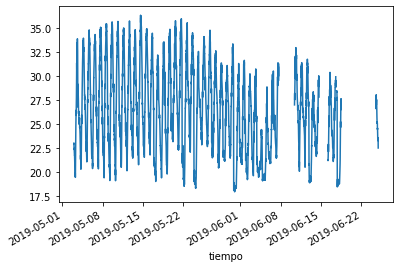

In [8]:
# datos.To_esolmet.plot()
# datos.To_ruoa_ruoa.plot()

In [9]:
datos.to_csv("../data/processed/mediciones_WS.csv")

In [10]:
archivo = "../data/raw/ae.csv"
nombres = np.genfromtxt("../data/raw/ae.csv",dtype="U",max_rows=1,
                        delimiter=",")
# for i in enumerate(nombres):
#     print(i)
nombres[0] = 'tiempo'
nombres[13]= "Ti"
    
def importa(archivo,nombres): 
    tmp = pd.read_csv(archivo,names=nombres,skiprows=1)
    tmp.tiempo = tmp.tiempo.str.replace("24:00:00","23:59:59")
    tmp.tiempo = "2019-" + tmp.tiempo
    tmp.tiempo = pd.to_datetime(tmp.tiempo,format="%Y- %m/%d %H:%M:%S")
    tmp.set_index('tiempo',inplace=True)
    return tmp


Zyanya y Alejando

In [11]:
archivo = "../data/raw/za.csv"
nombres = np.genfromtxt(archivo,delimiter=",",max_rows=1,dtype="U")

nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'hr'
nombres[3] = 'ws'
nombres[4] = 'wd'
nombres[5] = 'Id'
nombres[6] = 'Ib'
nombres[7] = 'alpha'
nombres[8] = 'Ti'
za =  importa(archivo,nombres)
za.index
# za.to_csv("../data/processed/C_za.csv")

DatetimeIndex(['2019-05-03 00:10:00', '2019-05-03 00:20:00',
               '2019-05-03 00:30:00', '2019-05-03 00:40:00',
               '2019-05-03 00:50:00', '2019-05-03 01:00:00',
               '2019-05-03 01:10:00', '2019-05-03 01:20:00',
               '2019-05-03 01:30:00', '2019-05-03 01:40:00',
               ...
               '2019-06-24 22:30:00', '2019-06-24 22:40:00',
               '2019-06-24 22:50:00', '2019-06-24 23:00:00',
               '2019-06-24 23:10:00', '2019-06-24 23:20:00',
               '2019-06-24 23:30:00', '2019-06-24 23:40:00',
               '2019-06-24 23:50:00', '2019-06-24 23:59:59'],
              dtype='datetime64[ns]', name='tiempo', length=7632, freq=None)

Astrid y E Spezzi

In [12]:
archivo = "../data/raw/ae.csv"
nombres = np.genfromtxt(archivo,delimiter=",",max_rows=1,dtype="U")

nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'hr'
nombres[4] = 'ws'
nombres[5] = 'wd'
nombres[6] = 'Id'
nombres[7] = 'Ib'
nombres[8] = 'alpha'
nombres[13] = 'Ti'

ae = importa(archivo,nombres)
ae = ae.resample("600S").interpolate(method="time")
ae.index

DatetimeIndex(['2019-06-08 00:00:00', '2019-06-08 00:10:00',
               '2019-06-08 00:20:00', '2019-06-08 00:30:00',
               '2019-06-08 00:40:00', '2019-06-08 00:50:00',
               '2019-06-08 01:00:00', '2019-06-08 01:10:00',
               '2019-06-08 01:20:00', '2019-06-08 01:30:00',
               ...
               '2019-06-24 22:20:00', '2019-06-24 22:30:00',
               '2019-06-24 22:40:00', '2019-06-24 22:50:00',
               '2019-06-24 23:00:00', '2019-06-24 23:10:00',
               '2019-06-24 23:20:00', '2019-06-24 23:30:00',
               '2019-06-24 23:40:00', '2019-06-24 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=2448, freq='600S')

In [13]:
ae.to_csv("../data/processed/C_ae.csv")

In [14]:
archivo = "../data/raw/bm.csv"
nombres = np.genfromtxt(archivo,delimiter=",",max_rows=1,dtype='U')
for i,nombre in enumerate(nombres):
    print(i,nombre)

nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'hr'
nombres[4] = 'ws'
nombres[5] = 'wd'
nombres[6] = 'Id'
nombres[7] = 'Ib'
nombres[8] = 'alpha'
nombres[9] = 'Ti'

bm = importa(archivo,nombres)
bm = bm.resample("600S").interpolate(method='time')

bm.index

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 Environment:Site Outdoor Air Relative Humidity [%](TimeStep)
3 Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)
4 Environment:Site Wind Speed [m/s](TimeStep)
5 Environment:Site Wind Direction [deg](TimeStep)
6 Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep)
7 Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)
8 Environment:Site Solar Altitude Angle [deg](TimeStep)
9 ZT3:Zone Mean Air Temperature [C](TimeStep)


DatetimeIndex(['2019-05-21 00:00:00', '2019-05-21 00:10:00',
               '2019-05-21 00:20:00', '2019-05-21 00:30:00',
               '2019-05-21 00:40:00', '2019-05-21 00:50:00',
               '2019-05-21 01:00:00', '2019-05-21 01:10:00',
               '2019-05-21 01:20:00', '2019-05-21 01:30:00',
               ...
               '2019-06-24 22:20:00', '2019-06-24 22:30:00',
               '2019-06-24 22:40:00', '2019-06-24 22:50:00',
               '2019-06-24 23:00:00', '2019-06-24 23:10:00',
               '2019-06-24 23:20:00', '2019-06-24 23:30:00',
               '2019-06-24 23:40:00', '2019-06-24 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=5040, freq='600S')

In [15]:
bm.to_csv("../data/processed/C_bm.csv")

# Carmona y Augusto

In [16]:
archivo  = "../data/raw/ca.csv"
nombres = np.genfromtxt(archivo,delimiter=",",max_rows=1,dtype='U')
# for i,nombre in enumerate(nombres):
#     print(i,nombre)

nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'hr'
nombres[3] = 'ws'
nombres[4] = 'wd'
nombres[5] = 'Id'
nombres[6] = 'Ib'
nombres[7] = 'alpha'
nombres[8] = 'Ti'

ca = importa(archivo,nombres)
ca = ca.resample("600S").interpolate(method='time')

ca.index

DatetimeIndex(['2019-05-25 00:00:00', '2019-05-25 00:10:00',
               '2019-05-25 00:20:00', '2019-05-25 00:30:00',
               '2019-05-25 00:40:00', '2019-05-25 00:50:00',
               '2019-05-25 01:00:00', '2019-05-25 01:10:00',
               '2019-05-25 01:20:00', '2019-05-25 01:30:00',
               ...
               '2019-06-23 22:20:00', '2019-06-23 22:30:00',
               '2019-06-23 22:40:00', '2019-06-23 22:50:00',
               '2019-06-23 23:00:00', '2019-06-23 23:10:00',
               '2019-06-23 23:20:00', '2019-06-23 23:30:00',
               '2019-06-23 23:40:00', '2019-06-23 23:50:00'],
              dtype='datetime64[ns]', name='tiempo', length=4320, freq='600S')

In [17]:
ca.to_csv("../data/processed/C_ca.csv")

In [18]:
# datos

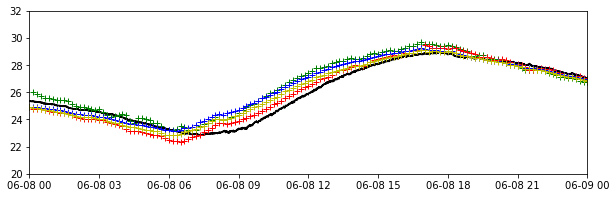

In [29]:
fig, ax = plt.subplots(figsize=(10,3))

fecha1 = parse("2019-06-08")
fecha2 = fecha1 + pd.Timedelta("1D")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(20,32)

# ax.plot(datos.To_esolmet,'r-',label="To")
ax.plot(datos.Ti,        'k-',label="Ti")

ax.plot(ae.Ti,"g+",label="ae")
ax.plot(ca.Ti,"r+",label="ca")
ax.plot(bm.Ti,"b+",label="bm")
ax.plot(za.Ti,"y+",label="za")
# ax.plot(.Ti,"g+",label="ae")

In [20]:
fecha2

datetime.datetime(2019, 6, 10, 0, 0)